<a href="https://colab.research.google.com/github/jjhwan-h/ML/blob/main/HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()
from ultralytics import YOLO

Ultralytics YOLOv8.2.22 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


# RoboFlow에서 만든 dataset unzip

In [ ]:
!unzip HW-8.v1i.yolov8.zip -d /content

# Training

In [ ]:
%cd /content
!yolo task=detect mode=train  data=data.yaml epochs=100 imgsz=640

/content
Ultralytics YOLOv8.2.22 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

# Val

In [ ]:
%cd /content
!yolo detect val model=/content/runs/detect/train3/weights/best.pt data=/content/data.yaml

/content
Ultralytics YOLOv8.2.22 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/valid/labels.cache... 62 images, 0 backgrounds, 0 corrupt: 100% 62/62 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:05<00:00,  1.41s/it]
                   all         62         90      0.725      0.809      0.835      0.501
                   cat         62         30      0.762      0.867      0.884      0.546
             hangyodon         62         30      0.722      0.694      0.742      0.545
             sea-otter         62         30      0.691      0.867      0.878      0.412
Speed: 3.1ms preprocess, 12.9ms inference, 0.0ms loss, 26.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# 이미지에 대하여 예측

In [ ]:
import cv2
from ultralytics import YOLO

model = YOLO("/content/runs/detect/train3/weights/best.pt")

results = model.predict("/content/han.jpeg")


image 1/1 /content/han.jpeg: 384x640 1 hangyodon, 439.7ms
Speed: 4.5ms preprocess, 439.7ms inference, 1502.0ms postprocess per image at shape (1, 3, 384, 640)


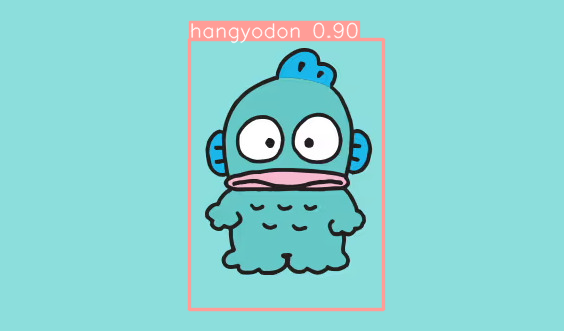

In [ ]:
from google.colab.patches import cv2_imshow

res_plotted = results[0].plot()

cv2_imshow(res_plotted)


image 1/1 /content/cat.jpeg: 448x640 1 cat, 14.5ms
Speed: 2.6ms preprocess, 14.5ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


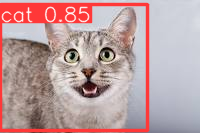

In [ ]:
results = model.predict("/content/cat.jpeg")
res_plotted = results[0].plot()

cv2_imshow(res_plotted)


image 1/1 /content/sea-otter.jpeg: 448x640 1 sea-otter, 360.2ms
Speed: 2.4ms preprocess, 360.2ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


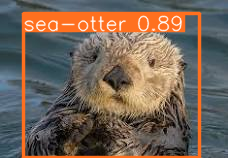

In [ ]:
results = model.predict("/content/sea-otter.jpeg")
res_plotted = results[0].plot()

cv2_imshow(res_plotted)